In [2]:
# import the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1988d9ac6fa0e195f6ea97b2565782ae


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | ji-parana
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | birjand
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | diamantino
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | jiayuguan
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | kadnikov
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | koslan
Processing Record 22 of Set 1 | butaritari
Proces

Processing Record 39 of Set 4 | talaya
Processing Record 40 of Set 4 | bourail
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | troitskoye
Processing Record 43 of Set 4 | koumra
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | jarinu
Processing Record 46 of Set 4 | imbituba
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | khonuu
City not found. Skipping...
Processing Record 50 of Set 4 | muhos
Processing Record 1 of Set 5 | boundiali
Processing Record 2 of Set 5 | jundia
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | bogatoye
Processing Record 6 of Set 5 | cockburn town
Processing Record 7 of Set 5 | marawi
Processing Record 8 of Set 5 | barcelos
Processing Record 9 of Set 5 | waverly
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | nakhon phanom
Proc

Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | kaeo
Processing Record 28 of Set 8 | faridpur
Processing Record 29 of Set 8 | berlevag
Processing Record 30 of Set 8 | rabo de peixe
Processing Record 31 of Set 8 | nenjiang
Processing Record 32 of Set 8 | chapada dos guimaraes
Processing Record 33 of Set 8 | tabas
Processing Record 34 of Set 8 | bayji
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | san matias
Processing Record 37 of Set 8 | ozernovskiy
Processing Record 38 of Set 8 | claremore
Processing Record 39 of Set 8 | polson
Processing Record 40 of Set 8 | skorping
Processing Record 41 of Set 8 | ginda
Processing Record 42 of Set 8 | worland
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | ternate
Processing Record 45 of Set 8 | nyrsko
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | sao lourenco do sul
Processing Record 48 of Set 8 | urucui
Processing Record 49 of Set 8 |

Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | tabuk
Processing Record 14 of Set 12 | garden city
Processing Record 15 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 16 of Set 12 | ambulu
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | falam
Processing Record 19 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 12 | okha
Processing Record 21 of Set 12 | morgan city
Processing Record 22 of Set 12 | sinegorye
Processing Record 23 of Set 12 | dryden
Processing Record 24 of Set 12 | dharchula
Processing Record 25 of Set 12 | oistins
Processing Record 26 of Set 12 | palasa
Processing Record 27 of Set 12 | sayyan
Processing Record 28 of Set 12 | zhangye
Processing Record 29 of Set 12 | half moon bay
Processing Record 30 of Set 12 | ust-nera
Processing Record 31 of Set 12 | aloleng
Processing Record 32 of Set 12 | dalvik
Processing Record 33 of Set 12 | hermiston
Processing Record 34 of Set 12 | y

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuuk,64.1835,-51.7216,21.20,86,20,14.97,GL,2021-03-15 03:19:27
1,Atuona,-9.8000,-139.0333,80.33,68,4,10.11,PF,2021-03-15 03:19:28
2,Ushuaia,-54.8000,-68.3000,48.20,71,75,8.05,AR,2021-03-15 03:15:43
3,Bethel,41.3712,-73.4140,27.00,44,3,1.01,US,2021-03-15 03:19:29
4,Mar Del Plata,-38.0023,-57.5575,70.00,94,0,3.44,AR,2021-03-15 03:15:00
5,Birjand,32.8663,59.2211,37.40,48,40,4.61,IR,2021-03-15 03:19:30
6,Saint-Philippe,-21.3585,55.7679,77.00,78,90,4.61,RE,2021-03-15 03:19:30
7,Diamantino,-14.4086,-56.4461,72.27,94,51,3.85,BR,2021-03-15 03:19:31
8,Albany,42.6001,-73.9662,24.01,31,27,1.99,US,2021-03-15 03:15:06
9,Bredasdorp,-34.5322,20.0403,66.20,94,100,3.44,ZA,2021-03-15 03:19:31


In [11]:
# new order for df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,2021-03-15 03:19:27,64.1835,-51.7216,21.20,86,20,14.97
1,Atuona,PF,2021-03-15 03:19:28,-9.8000,-139.0333,80.33,68,4,10.11
2,Ushuaia,AR,2021-03-15 03:15:43,-54.8000,-68.3000,48.20,71,75,8.05
3,Bethel,US,2021-03-15 03:19:29,41.3712,-73.4140,27.00,44,3,1.01
4,Mar Del Plata,AR,2021-03-15 03:15:00,-38.0023,-57.5575,70.00,94,0,3.44
5,Birjand,IR,2021-03-15 03:19:30,32.8663,59.2211,37.40,48,40,4.61
6,Saint-Philippe,RE,2021-03-15 03:19:30,-21.3585,55.7679,77.00,78,90,4.61
7,Diamantino,BR,2021-03-15 03:19:31,-14.4086,-56.4461,72.27,94,51,3.85
8,Albany,US,2021-03-15 03:15:06,42.6001,-73.9662,24.01,31,27,1.99
9,Bredasdorp,ZA,2021-03-15 03:19:31,-34.5322,20.0403,66.20,94,100,3.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

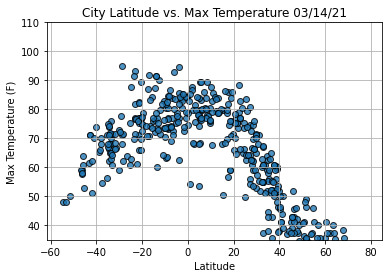

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(35, 110)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

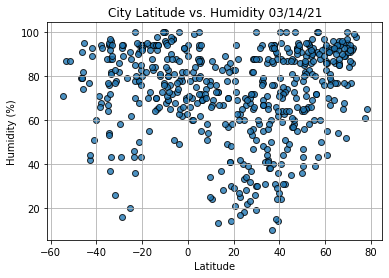

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

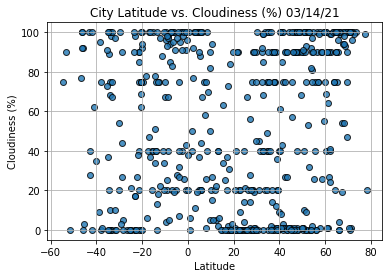

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

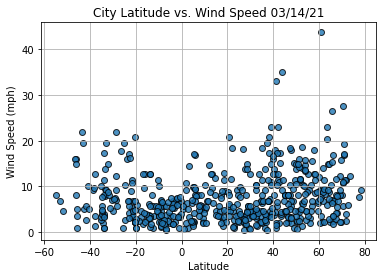

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-03-15 03:19:34
Lat                      -42.8794
Lng                      147.3294
Max Temp                    71.01
Humidity                       42
Cloudiness                     40
Wind Speed                  19.57
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,2021-03-15 03:19:27,64.1835,-51.7216,21.20,86,20,14.97
3,Bethel,US,2021-03-15 03:19:29,41.3712,-73.4140,27.00,44,3,1.01
5,Birjand,IR,2021-03-15 03:19:30,32.8663,59.2211,37.40,48,40,4.61
8,Albany,US,2021-03-15 03:15:06,42.6001,-73.9662,24.01,31,27,1.99
10,Ponta Do Sol,PT,2021-03-15 03:19:33,32.6667,-17.1000,55.00,69,99,3.00


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

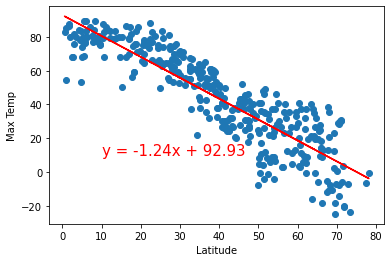

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 'Max Temp',(10,10))

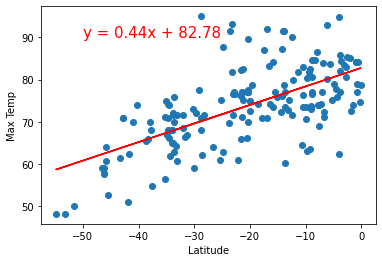

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


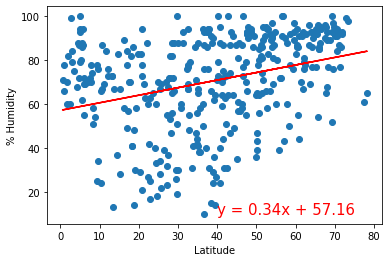

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

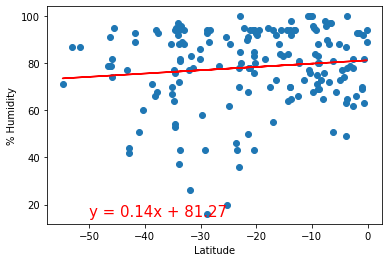

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

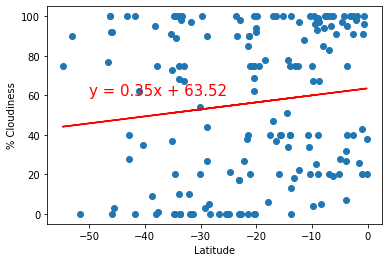

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

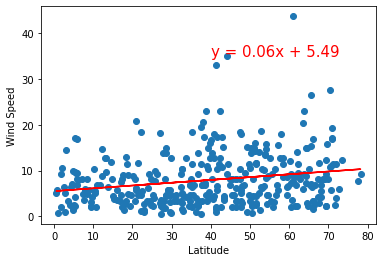

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

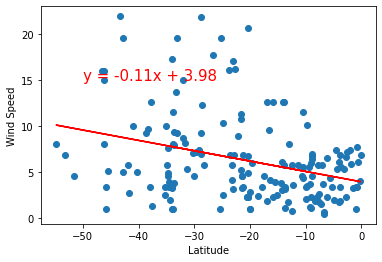

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))